# Data analysis
## Running some simple models first

In [1]:
#Setting up environment
import pandas as pd
import os
import numpy as np
from IPython.display import Math
 
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, svm,tree,preprocessing
from sklearn.tree import DecisionTreeClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (auc, confusion_matrix, roc_curve, 
                             accuracy_score, precision_score)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#Uploading data
df_processed= pd.read_csv("/Suzi fun files/QB course/QB_DS_FinalProject/data/processed/data_all_features.csv", index_col=[0])
df_processed.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_category
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [3]:
#Split data into test and train
target = df_processed['diagnosis_category']
X = df_processed.drop('diagnosis_category',axis = 1)
X = X.values
X_train, X_test, y_train, y_test  = train_test_split(X, target, test_size = 0.2)

In [4]:
df_processed.shape

(569, 31)

## First algorithm: decision tree
- suitable for data with collinearity
- can be visualised 
- our dataset is quite small so computational complexity not a big problem 

I score my grid search with recall, as I want high recall in tumour diagnosis. 

In [5]:
# Tune Decision Tree
num_leaves = [5, 10, 15, 20, 30, 40, 50]
depth = np.arange(3, 21)
num_samples_split = np.arange(10,20)
params_DT = {"max_depth": depth, "min_samples_leaf": num_leaves, "min_samples_split":num_samples_split}
random_state = 42
classifier_DT = DecisionTreeClassifier(random_state=random_state)
grid_DT = GridSearchCV(classifier_DT, params_DT,scoring='recall');
grid_DT.fit(X_train,y_train)

prediction_DT = grid_DT.predict(X_test)
probability_DT = grid_DT.predict_proba(X_test)

In [6]:
grid_DT_df = pd.DataFrame(grid_DT.cv_results_)
grid_DT_df.head(50)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002002,1.011524e-06,0.001008,1.303743e-05,3,5,10,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.927273,0.851852,0.925926,0.901796,0.035204,361
1,0.002001,3.725913e-06,0.000999,3.617543e-06,3,5,11,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.927273,0.851852,0.925926,0.901796,0.035204,361
2,0.001666,4.709772e-04,0.000669,4.728893e-04,3,5,12,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.927273,0.851852,0.925926,0.901796,0.035204,361
3,0.001999,1.184119e-06,0.001000,2.973602e-07,3,5,13,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.927273,0.851852,0.925926,0.901796,0.035204,361
4,0.002000,3.212513e-06,0.000333,4.703588e-04,3,5,14,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.927273,0.851852,0.925926,0.901796,0.035204,361
5,0.002000,1.730247e-06,0.000333,4.715951e-04,3,5,15,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.927273,0.851852,0.925926,0.901796,0.035204,361
6,0.001667,4.710896e-04,0.000999,1.215701e-06,3,5,16,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.927273,0.851852,0.925926,0.901796,0.035204,361
7,0.000705,9.170288e-04,0.000000,0.000000e+00,3,5,17,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.927273,0.851852,0.925926,0.901796,0.035204,361
8,0.000000,0.000000e+00,0.000000,0.000000e+00,3,5,18,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.927273,0.851852,0.925926,0.901796,0.035204,361
9,0.000000,0.000000e+00,0.005216,7.377047e-03,3,5,19,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.927273,0.851852,0.925926,0.901796,0.035204,361


In [7]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction_DT))

Accuracy: 0.9122807017543859


[Text(558.0, 475.65000000000003, 'perimeter_worst <= 106.1\nsamples = 100.0%\nvalue = [0.642, 0.358]'),
 Text(334.79999999999995, 339.75, 'concave points_worst <= 0.135\nsamples = 63.1%\nvalue = [0.951, 0.049]'),
 Text(223.2, 203.85000000000002, 'area_se <= 31.95\nsamples = 58.0%\nvalue = [0.989, 0.011]'),
 Text(111.6, 67.94999999999999, 'samples = 53.6%\nvalue = [0.996, 0.004]'),
 Text(334.79999999999995, 67.94999999999999, 'samples = 4.4%\nvalue = [0.9, 0.1]'),
 Text(446.4, 203.85000000000002, 'samples = 5.1%\nvalue = [0.522, 0.478]'),
 Text(781.1999999999999, 339.75, 'concave points_mean <= 0.049\nsamples = 36.9%\nvalue = [0.113, 0.887]'),
 Text(669.5999999999999, 203.85000000000002, 'samples = 5.3%\nvalue = [0.583, 0.417]'),
 Text(892.8, 203.85000000000002, 'texture_mean <= 17.685\nsamples = 31.6%\nvalue = [0.035, 0.965]'),
 Text(781.1999999999999, 67.94999999999999, 'samples = 4.4%\nvalue = [0.25, 0.75]'),
 Text(1004.4, 67.94999999999999, 'samples = 27.3%\nvalue = [0.0, 1.0]')]

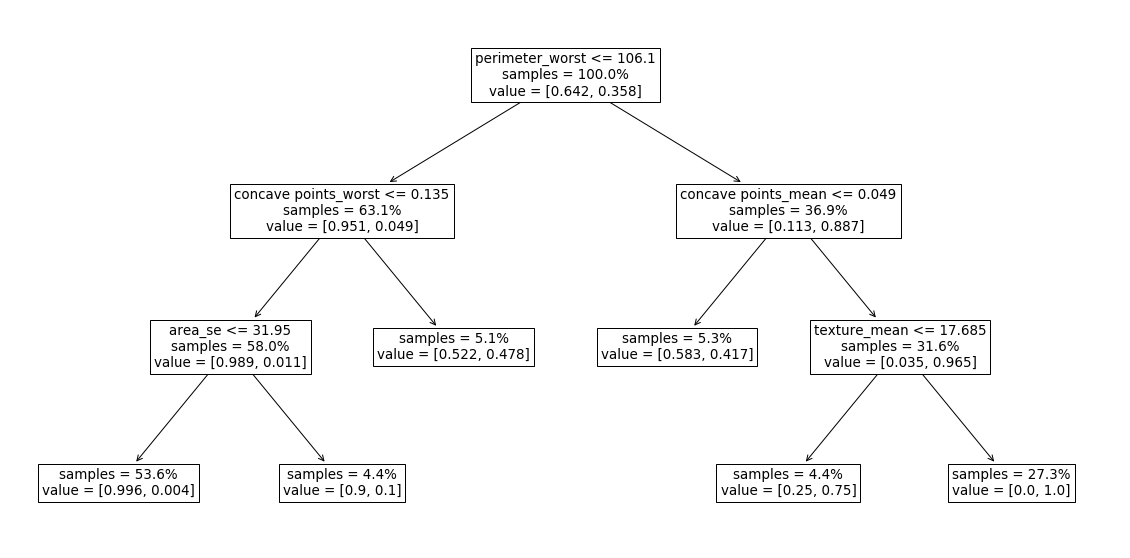

In [8]:
model_DT= grid_DT.best_estimator_
plt.figure(figsize=(20,10)) 
tree.plot_tree(model_DT, feature_names=df_processed.columns[0:-1], impurity=False, proportion=True)

In [9]:
print(metrics.confusion_matrix(y_test, prediction_DT))

[[62  3]
 [ 7 42]]


In [10]:
tree_tn, tree_fn, tree_fp, tree_tp = metrics.confusion_matrix(y_test, prediction_DT).ravel()
recall_DT= tree_tp/(tree_tp + tree_fn)
print(recall_DT)

0.9333333333333333


{'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_split': 10}


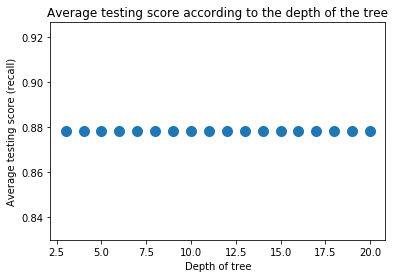

In [11]:
plt.plot(grid_DT_df[['mean_test_score', 'param_max_depth']].groupby('param_max_depth').mean(), 
         marker='o', linestyle='None', markersize = 10.0)
plt.xlabel('Depth of tree')
plt.ylabel('Average testing score (recall)')
plt.title('Average testing score according to the depth of the tree')

print(grid_DT.best_params_)

## That's my decision tree done.
## Let's try another non-parametric algorithm, support vector machines. 

For SVM, I need to normalise my data for zero mean and unit variance. 

Some info on SVM https://statinfer.com/204-6-8-svm-advantages-disadvantages-applications/

Application to this dataset https://towardsdatascience.com/breast-cancer-classification-using-support-vector-machine-svm-a510907d4878

Tuning inspired by https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0

In [12]:
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled  = preprocessing.scale(X_test)

In [13]:
# Tune support vector machine
kernels = ['linear','poly','rbf']
Cs = [0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]
params_SVM = {"kernel": ['linear'], "C":Cs}
{"kernel" : ['poly'],"gamma": gammas, "C":Cs}
{"kernel" : ['rbf'],"gamma": gammas, "C":Cs}
classifier_SVM = svm.SVC(probability=True)
grid_SVM = GridSearchCV(classifier_SVM,params_SVM,scoring='recall')
grid_SVM.fit(X_train_scaled,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [14]:
grid_SVM_df = pd.DataFrame(grid_SVM.cv_results_)
grid_SVM_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003999,0.000022,0.001000,2.533178e-06,0.01,linear,"{'C': 0.01, 'kernel': 'linear'}",0.909091,0.907407,0.944444,0.920265,0.017055,5
1,0.003328,0.000475,0.001005,6.743496e-06,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.963636,0.944444,0.962963,0.957044,0.008884,1
2,0.003999,0.000002,0.000333,4.712580e-04,1,linear,"{'C': 1, 'kernel': 'linear'}",0.963636,0.907407,0.981481,0.950898,0.031507,2
3,0.006325,0.001256,0.001000,3.893359e-07,10,linear,"{'C': 10, 'kernel': 'linear'}",0.927273,0.925926,0.962963,0.938670,0.017130,3
4,0.008314,0.001237,0.001019,1.399309e-05,100,linear,"{'C': 100, 'kernel': 'linear'}",0.909091,0.925926,0.962963,0.932556,0.022507,4


In [15]:
prediction_SVM = grid_SVM.predict(X_test_scaled)
probability_SVM = grid_SVM.predict_proba(X_test_scaled)
print(grid_SVM.best_params_)
print("Accuracy:",metrics.accuracy_score(y_test, prediction_SVM))
print(metrics.confusion_matrix(y_test, prediction_SVM))

{'C': 0.1, 'kernel': 'linear'}
Accuracy: 0.9649122807017544
[[65  0]
 [ 4 45]]


In [16]:
svm_tn, svm_fn, svm_fp, svm_tp = metrics.confusion_matrix(y_test, prediction_SVM).ravel()
recall_SVM = svm_tp/(svm_tp + svm_fn)
print(recall_SVM)

1.0


## K-nearest neighbours, popular with this dataset
See https://www.geeksforgeeks.org/ml-kaggle-breast-cancer-wisconsin-diagnosis-using-knn/ or *Sarkar M, Leong TY. Application of K-nearest neighbors algorithm on breast cancer diagnosis problem. Proc AMIA Symp. 2000;759–763.*

In [17]:
# Tune KNN
neighbours = [5,10,15,20]
power_parameter = [1,2]
params_KNN = {"n_neighbors": neighbours, "p": power_parameter}
classifier_KNN = KNeighborsClassifier()
grid_KNN = GridSearchCV(classifier_KNN,params_KNN,scoring='recall')
grid_KNN.fit(X_train_scaled,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [5, 10, 15, 20], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [18]:
prediction_KNN = grid_KNN.predict(X_test_scaled)
probability_KNN = grid_KNN.predict_proba(X_test_scaled)
print(grid_KNN.best_params_)
print("Accuracy:",metrics.accuracy_score(y_test, prediction_KNN))
print(metrics.confusion_matrix(y_test, prediction_KNN))

{'n_neighbors': 5, 'p': 1}
Accuracy: 0.9385964912280702
[[65  0]
 [ 7 42]]


In [19]:
knn_tn, knn_fn, knn_fp, knn_tp = metrics.confusion_matrix(y_test, prediction_KNN).ravel()
recall_KNN = knn_tp/(knn_tp + knn_fn)
print(recall_KNN)

1.0


## Compare all models

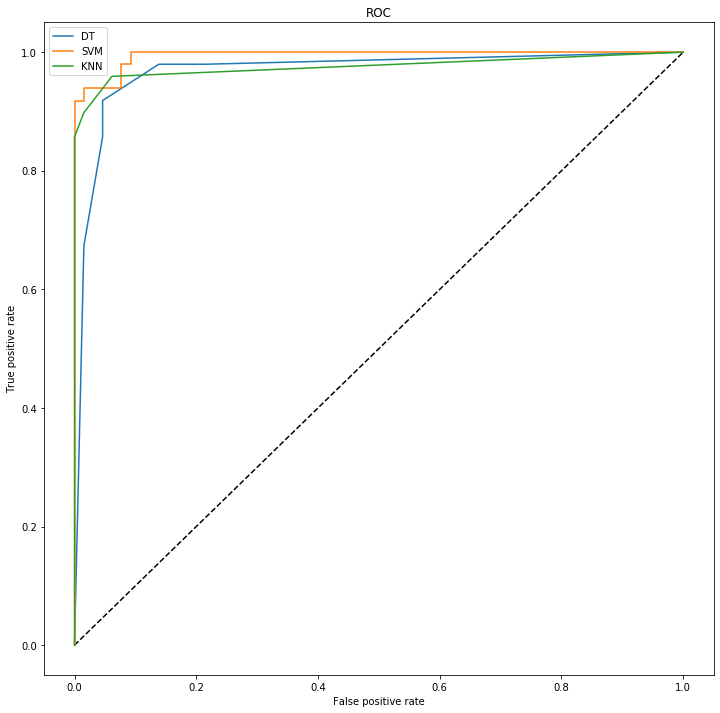

In [20]:
false_pos_rate_DT,true_pos_rate_DT, thresholds_DT = roc_curve(y_test, probability_DT[:, 1])
false_pos_rate_SVM,true_pos_rate_SVM, thresholds_SVM = roc_curve(y_test, probability_SVM[:, 1])
false_pos_rate_KNN,true_pos_rate_KNN, thresholds_KNN = roc_curve(y_test, probability_KNN[:, 1])

# Plot the ROC curve
fig = plt.figure(figsize=(12,12))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_pos_rate_DT, true_pos_rate_DT, label='DT')
plt.plot(false_pos_rate_SVM, true_pos_rate_SVM, label='SVM')
plt.plot(false_pos_rate_KNN, true_pos_rate_KNN, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.legend(loc='best')
plt.show()

In [21]:
print(thresholds_DT)
print(thresholds_SVM)
print(thresholds_KNN)

[2.         1.         0.75       0.47826087 0.41666667 0.1
 0.00409836]
[2.00000000e+00 1.00000000e+00 5.55967141e-01 3.98803595e-01
 3.47062092e-01 1.30748695e-01 1.01423583e-01 1.00942923e-01
 8.89879979e-02 1.18153755e-05]
[2.  1.  0.8 0.6 0.4 0.2 0. ]


In [22]:
# Summary
print("Accuracy DT:",metrics.accuracy_score(y_test, prediction_DT)*100,"Recall DT:",recall_DT*100)
print("Accuracy SVM:",metrics.accuracy_score(y_test, prediction_SVM)*100,"Recall SVM:",recall_SVM*100)
print("Accuracy KNN:",metrics.accuracy_score(y_test, prediction_KNN)*100,"Recall KNN:",recall_KNN*100)

Accuracy DT: 91.22807017543859 Recall DT: 93.33333333333333
Accuracy SVM: 96.49122807017544 Recall SVM: 100.0
Accuracy KNN: 93.85964912280701 Recall KNN: 100.0
